In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

In [2]:
# Loading data
df = pd.read_csv('properties.csv')
df.head()

,Address,Suburb,State,Post code,Price,Property type,Bed,Bath,Parking
0,"3/9 Lambert Street,",CAMMERAY,NSW,2062,$690,Apartment / Unit / Flat,2 Beds,1 Bath,−
1,"18 Chatham Way,",HARRISDALE,WA,6112,$820 / PER WEEK,House,4 Beds,2 Baths,2 Parking
2,"102/157-163 Burwood Road,",HAWTHORN,VIC,3122,$580.00 per week,Apartment / Unit / Flat,2 Beds,1 Bath,1 Parking
3,"77 Unnaro St,",COOLOONGUP,WA,6168,$570 Per Week,House,3 Beds,2 Baths,3 Parking
4,"7/77 Milson Road,",CREMORNE POINT,NSW,2090,$850.00 pw,Apartment / Unit / Flat,2 Beds,1 Bath,−


### Explore the dataset

In [3]:
# Check dimension
df.shape

(996, 9)

In [4]:
# Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Address        996 non-null    object
 1   Suburb         996 non-null    object
 2   State          996 non-null    object
 3   Post code      996 non-null    int64 
 4   Price          996 non-null    object
 5   Property type  996 non-null    object
 6   Bed            996 non-null    object
 7   Bath           996 non-null    object
 8   Parking        996 non-null    object
dtypes: int64(1), object(8)
memory usage: 70.2+ KB


### Data cleaning

In [5]:
# Rename columns to 
df.rename(columns={'Address': 'address',
                   'Suburb': 'suburb',
                   'State': 'state',
                   'Post code': 'post_code',
                   'Price': 'price',
                   'Property type': 'property_type',
                   'Bed': 'bed',
                   'Bath': 'bath',
                   'Parking': 'parking'}, inplace=True)

#### Inconsistancies in the "Price" column

In [6]:
# Handling column "Price"
import re

def extract_numbers(price):
    if isinstance(price, str): # Ensure dtype of 'Price' is string
        match = re.search(r'\d[\d,]*', price) # Apply regex
        return int(match.group().replace(',', '')) if match else None # Remove commas and convert to integer
    return None

# Apply to column 'Price'
df['price'] = df['price'].apply(extract_numbers)
print(df)

                        address          suburb state  post_code   price  \
0          3/9 Lambert Street,         CAMMERAY   NSW       2062   690.0   
1              18 Chatham Way,       HARRISDALE    WA       6112   820.0   
2    102/157-163 Burwood Road,         HAWTHORN   VIC       3122   580.0   
3                77 Unnaro St,       COOLOONGUP    WA       6168   570.0   
4            7/77 Milson Road,   CREMORNE POINT   NSW       2090   850.0   
..                          ...             ...   ...        ...     ...   
991          73/1 Kiara Close,     NORTH SYDNEY   NSW       2060  1250.0   
992         13 Northend Close,        SWAN VIEW    WA       6056   580.0   
993    18/2-6 Junction Street,             RYDE   NSW       2112   680.0   
994      648A Willoughby Road,       WILLOUGHBY   NSW       2068  1150.0   
995            40 Orania Cres,        CALAMVALE   QLD       4116   650.0   

               property_type     bed     bath    parking  
0    Apartment / Unit / Flat

'Price' column contains values in various format:
   
   - Plain numeric values (`$690`)
   
   - Decimals (`$850.00`)
   
   - Descriptive formats (`$750 pw`, `$750 PER WEEK`, `$750 Per week`, `$750 per week`, `$750 weekly`)

   - Incorrect typos (`$4000/w`)
   
   - Comma-separated currency format (`$1,150`)
   
   - Noisy entries (`$650 per week!! Fully Air-conditioned Property!`)

*Standardizing price*: The pattern `\d[\d]*` matches any sequence starting with a digit followed by digits or commas. It will stop matching at the first non-digit/non-comma character.
   + `\d`: match the first digit
    
   + `[\d,]*`: match digits and commas, keep matching as long as the characters are digits and commas
   

#### Extraneous text in numeric fields

In [7]:
# Extract only number if column bed, bath, and parking
def extract_count(count):
    if isinstance(count, str):
        numbers = ''.join(re.findall(r'\d+', count)) # Use regex to find
        return int(numbers) if numbers else None
    return None

# Apply to column bed, bath, and parking
df['bed'] = df['bed'].apply(extract_count)
df['bath'] = df['bath'].apply(extract_count)
df['parking'] = df['parking'].apply(extract_count)

In [8]:
# Check dtypes of bed, bath, and parking
df.dtypes

address           object
suburb            object
state             object
post_code          int64
price            float64
property_type     object
bed              float64
bath             float64
parking          float64
dtype: object

In [9]:
# Handle missing values and convert values to int
df['bed'] = df['bed'].fillna(0).astype(int)
df['bath'] = df['bath'].fillna(0).astype(int)
df['parking'] = df['parking'].fillna(0).astype(int)

#### Cleaning up Address

In [10]:
# Remove comma and any whitespace at the end of column "address"
df['address'] = df['address'].str.rstrip(', ')

#### Check Suburb and State

In [11]:
unique_suburb = df["suburb"].nunique()
print(f"Number of unique suburbs: {unique_suburb}")

Number of unique suburbs: 475


In [12]:
df["suburb"].unique()

array(['CAMMERAY', 'HARRISDALE', 'HAWTHORN', 'COOLOONGUP',
       'CREMORNE POINT', 'EARLWOOD', 'ST KILDA', 'MERRYLANDS', 'CAMILLO',
       'ROSEVILLE', 'GORDON', 'ULTIMO', 'ZETLAND', 'BANKSTOWN',
       'CAMPBELL', 'REDLYNCH', 'MOOROOBOOL', 'GREENSBOROUGH',
       'HELENSVALE', 'REDFERN', 'BRUNSWICK', 'EDGECLIFF', 'MAROUBRA',
       'SOUTH YARRA', 'NORTH MELBOURNE', 'TUART HILL', 'NORTH SYDNEY',
       'GREENWAY', 'KENSINGTON', 'SOUTHBANK', 'ASHFIELD', 'KINGSLEY',
       'MALVERN EAST', 'DUBBO', 'WOOLLAHRA', 'PORT MELBOURNE',
       'DARLINGHURST', 'KINGSTON', 'GUNGAHLIN', 'GRIFFIN', 'APPLECROSS',
       'COMO', 'ELWOOD', 'STRATHFIELD', 'ANNANDALE', 'MIDDLETON',
       'DARWIN CITY', 'WENTWORTH POINT', 'MELBOURNE', 'BRIGHTON',
       'PHILLIP', 'GLEN IRIS', 'RIPPONLEA', 'BONDI JUNCTION',
       'ST LEONARDS', 'LANE COVE', 'ORMOND', 'AUCHENFLOWER', 'CALDERWOOD',
       'CREMORNE', 'BARTON', 'ABBOTSFORD', 'CHIPPENDALE', 'POTTS POINT',
       'DOUBLE BAY', 'PENRITH', 'COBURG NORTH', 'CLA

There is no whitespaces in `suburb`

In [13]:
df['state'].unique()

array(['NSW', 'WA', 'VIC', 'ACT', 'QLD', 'SA', 'NT', 'TAS'], dtype=object)

In [14]:
# Check for null values
df.isnull().sum()

address          0
suburb           0
state            0
post_code        0
price            2
property_type    0
bed              0
bath             0
parking          0
dtype: int64

In [15]:
null_price = df.loc[df['price'].isna()]
null_price

,address,suburb,state,post_code,price,property_type,bed,bath,parking
634,1/19 Henderson Road,QUEANBEYAN,NSW,2620,NaN,Townhouse,2,2,1
651,705/71 Macquarie Street,SYDNEY,NSW,2000,NaN,Apartment / Unit / Flat,1,1,1


In [16]:
# Explore the minimum and maximum price
print(min(df["price"]))
print(max(df["price"]))

1.0
6000.0


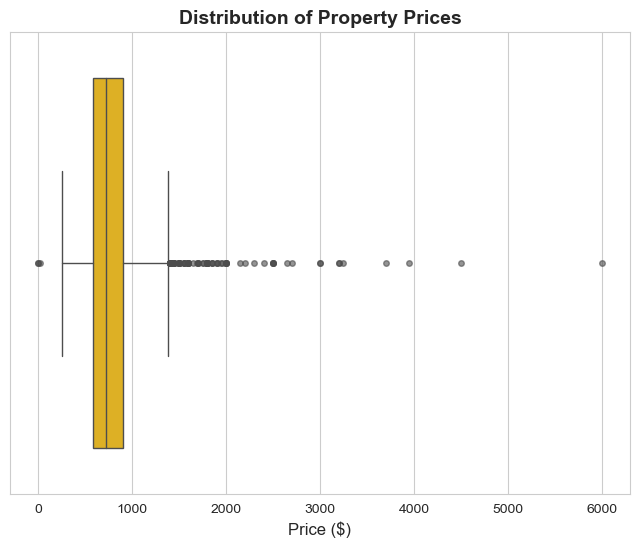

In [17]:
# Set figure size
plt.figure(figsize=(8, 6))

# Set style
sns.set_style("whitegrid")

# Box plot
sns.boxplot(x=df['price'], color="#fcc006", linewidth=1, fliersize=4, flierprops=dict(marker='o', color='red', alpha=0.6))

# Add title and labels
plt.title("Distribution of Property Prices", fontsize=14, fontweight='bold')
plt.xlabel("Price ($)", fontsize=12)

# Improve visibility of axis
plt.xticks(fontsize=10)
plt.show()

In [18]:
high_rent = df[df["price"] >= 3000]
high_rent

,address,suburb,state,post_code,price,property_type,bed,bath,parking
72,20B Court Road,DOUBLE BAY,NSW,2028,3000.0,House,4,2,2
149,67 View Street,WOOLLAHRA,NSW,2025,3200.0,House,3,2,2
321,14 Myuna Road,DOVER HEIGHTS,NSW,2030,3250.0,House,4,3,3
547,74 Watson Street,BONDI,NSW,2026,4500.0,House,6,3,2
554,107 Hopetoun Avenue,VAUCLUSE,NSW,2030,3950.0,House,4,4,2
555,71 Onslow St,ROSE BAY,NSW,2029,3000.0,House,3,2,2
749,99 Clement Street,SWANBOURNE,WA,6010,3700.0,House,5,3,4
767,19 Parriwi Road,MOSMAN,NSW,2088,6000.0,House,5,5,2
842,145 Male Street,BRIGHTON,VIC,3186,3200.0,House,4,3,3


In [19]:
# Drop properties having rent of under 100
df = df[(df["price"] > 100) | (df["price"].isna())]

In [20]:
df["price"] = df["price"].fillna(df["price"].mean())

In [21]:
# Check for rows having no bed, bath, and parking
imcomplete_listing = df.loc[(df['bed'] == 0) & (df['bath'] == 0) & (df['parking'] == 0)]
imcomplete_listing

,address,suburb,state,post_code,price,property_type,bed,bath,parking
76,5/24 Eliza Street,CLAYFIELD,QLD,4011,600.0,Apartment / Unit / Flat,0,0,0
836,705/9 Union Street,NUNDAH,QLD,4012,520.0,Apartment / Unit / Flat,0,0,0


In [22]:
# Remove rows having no bed, bath, and parking
df = df[~((df['bed'] == 0) & (df['bath'] == 0) & (df['parking'] == 0))]

In [23]:
# Dataset dimension
df.shape

(991, 9)

In [24]:
# Overview of data
df.describe()

,post_code,price,bed,bath,parking
count,991.000000,991.000000,991.000000,991.000000,991.000000
mean,2882.029263,833.138422,2.356206,1.517659,1.231080
std,1042.774092,463.823971,1.134073,0.649352,0.856398
min,800.000000,250.000000,0.000000,1.000000,0.000000
25%,2064.000000,580.000000,2.000000,1.000000,1.000000
50%,2611.000000,720.000000,2.000000,1.000000,1.000000
75%,3181.500000,900.000000,3.000000,2.000000,2.000000
max,7306.000000,6000.000000,7.000000,6.000000,7.000000


In [27]:
df.to_csv('/Users/phuonganhpham/cleaned_property_data.csv', index=False)